# Student Performance Predictor

First 5 rows:
    Age  Gender  Study_Hours  Sleep_Quality  Focus_Level     Mood Device_Used  \
0   20  Female            8              5            8    Happy      Laptop   
1   23    Male            5              5            6  Neutral      Tablet   
2   22    Male            8              8            4  Neutral      Tablet   
3   25   Other            5              5            7  Neutral      Mobile   
4   21  Female            5              5            5    Happy      Mobile   

   Study_Goal Lighting Background_Noise Note_Taking_Method Session_Type  \
0   Pass Exam  Natural            Noise                NaN        Group   
1   Pass Exam  Natural            Music            Digital         Solo   
2   Pass Exam  Natural            Noise            Digital         Solo   
3  Score High  Natural           Silent            Digital        Group   
4  Score High      Dim           Silent            Digital         Solo   

      Major   Internet_Use  Retention_Score Performan

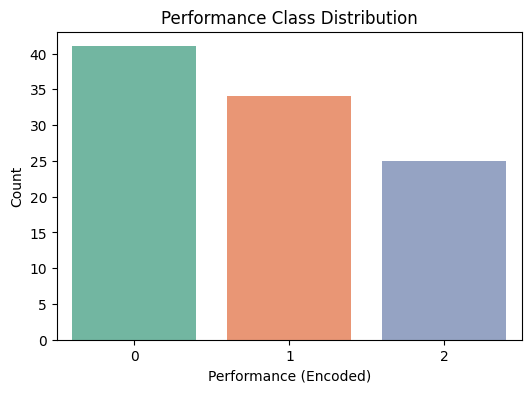

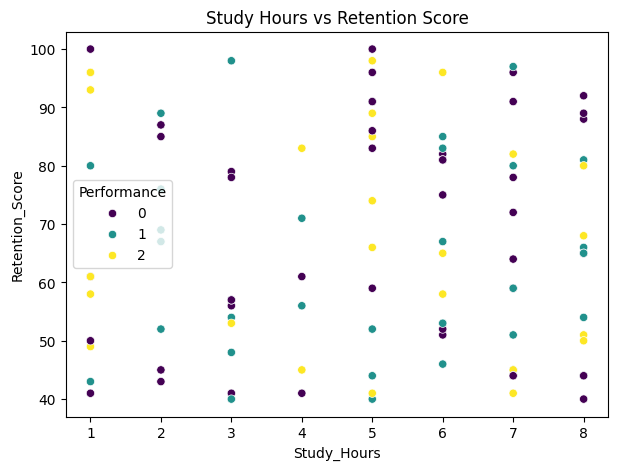

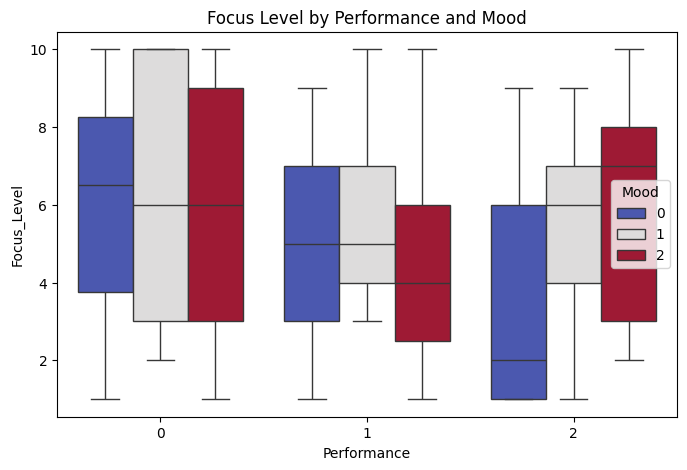

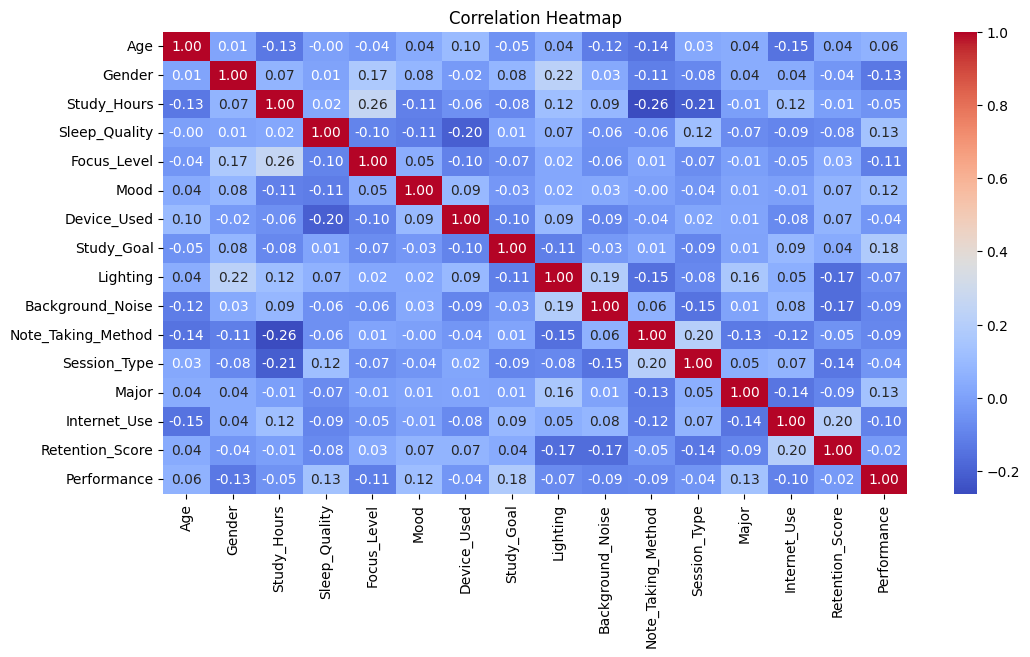


Confusion Matrix:
 [[5 1 0]
 [3 2 2]
 [5 2 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.83      0.53         6
           1       0.40      0.29      0.33         7
           2       0.00      0.00      0.00         7

    accuracy                           0.35        20
   macro avg       0.26      0.37      0.29        20
weighted avg       0.26      0.35      0.27        20


Accuracy Score: 0.35

Predicted Performance: High


In [24]:
# student_performance_predictor.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ----------------------------------
# 1️⃣ LOAD DATA
# ----------------------------------

df = pd.read_csv("Student_Performance_Study.csv")
print("First 5 rows:\n", df.head())  # Preview data
df.columns = [col.strip().replace(" ", "_").replace("(", "").replace(")", "") for col in df.columns]

print("✅ Dataset loaded.")
print("📌 Columns:", df.columns.tolist())

# --------------------
# 3. Dataset Summary
# --------------------
print("\n🔹 Shape:", df.shape)
print("\n🔹 Info:")
print(df.info())
print("\n🔹 Describe:")
print(df.describe())
print("\n🔹 First 5 Rows:")
print(df.head())
print("\n🔹 Missing Values:")
print(df.isnull().sum())

# ----------------------------------
# 2️⃣ PREPROCESSING
# ----------------------------------

# Encode categorical features (except target)
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    if col != "Performance":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Encode target
performance_encoder = LabelEncoder()
df["Performance"] = performance_encoder.fit_transform(df["Performance"])

# Define features and target
X = df.drop("Performance", axis=1)
y = df["Performance"]

# Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ----------------------------------
# 3️⃣ VISUALIZATIONS (EDA)
# ----------------------------------

# 1. Performance Count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Performance", hue="Performance", palette="Set2", legend=False)
plt.title("Performance Class Distribution")
plt.xlabel("Performance (Encoded)")
plt.ylabel("Count")
plt.savefig("plot1_performance_distribution.png")
plt.show()

# 2. Study Hours vs Retention Score
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="Study_Hours", y="Retention_Score", hue="Performance", palette="viridis")
plt.title("Study Hours vs Retention Score")
plt.savefig("plot2_study_vs_retention.png")
plt.show()

# 3. Focus Level by Mood and Performance
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Performance", y="Focus_Level", hue="Mood", palette="coolwarm")
plt.title("Focus Level by Performance and Mood")
plt.savefig("plot3_focus_mood.png")
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig("plot4_correlation_heatmap.png")
plt.show()

# ----------------------------------
# 4️⃣ MODEL TRAINING
# ----------------------------------

model = LogisticRegression(max_iter=5000, solver="saga", random_state=42)
model.fit(X_train, y_train)

# ----------------------------------
# 5️⃣ MODEL EVALUATION
# ----------------------------------

y_pred = model.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# ----------------------------------
# 6️⃣ PREDICTION FUNCTION
# ----------------------------------

def predict_performance(new_data):
    input_df = pd.DataFrame([new_data])
    
    # Encode input
    for col, le in label_encoders.items():
        if col in input_df.columns:
            input_df[col] = input_df[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else le.transform([le.classes_[0]])[0])
    
    # Scale input
    input_scaled = pd.DataFrame(scaler.transform(input_df[X.columns]), columns=X.columns)
    
    # Predict and decode output
    prediction = model.predict(input_scaled)
    return performance_encoder.inverse_transform(prediction)[0]

# ----------------------------------
# 7️⃣ SAMPLE PREDICTION
# ----------------------------------

sample_input = {
    "Age": 20,
    "Gender": "Female",
    "Study_Hours": 8,
    "Sleep_Quality": 5,
    "Focus_Level": 8,
    "Mood": "Happy",
    "Device_Used": "Laptop",
    "Study_Goal": "Pass Exam",
    "Lighting": "Natural",
    "Background_Noise": "Noise",
    "Note_Taking_Method": "None",
    "Session_Type": "Group",
    "Major": "Commerce",
    "Internet_Use": "Online Class",
    "Retention_Score": 81
}

predicted_output = predict_performance(sample_input)
print("\nPredicted Performance:", predicted_output)
